# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data = pd.read_csv("web_traffic.csv")

df = pd.DataFrame(data)
df.tail()

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [3]:
#Ensure any time/date columns are in proper datetime format.

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])  # Replace with your actual column name

#You can then extract time-based features

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Understand the Dataset

### •	Number of rows and columns
### •	Data types
### •	Summary statistics (mean, min, max)

In [5]:
#  Number of Rows and Columns
print("Shape of the dataset:", df.shape)   #Output: (rows, columns)

Shape of the dataset: (10, 9)


In [6]:
# Data Types
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
VisitID                     int64
Date               datetime64[ns]
UserType                   object
Device                     object
SessionDuration             int64
PagesVisited                int64
year                        int32
month                       int32
day                         int32
dtype: object


In [10]:
# Summary Statistics
df[['SessionDuration', 'PagesVisited']].describe()

,SessionDuration,PagesVisited
count,10.000000,10.000000
mean,247.000000,4.400000
std,83.672643,1.349897
min,120.000000,3.000000
25%,195.000000,3.250000
50%,230.000000,4.000000
75%,290.000000,5.000000
max,400.000000,7.000000


# Session Duration by Device

### Goal: See which devices have longer average session times.

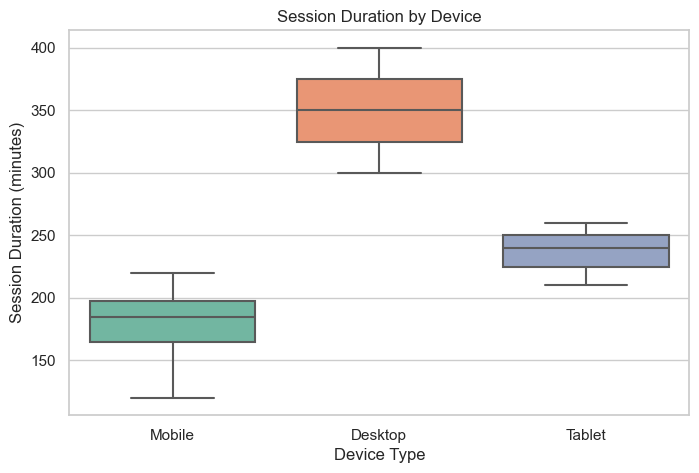

In [13]:
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Device', y='SessionDuration', palette='Set2')

# Add title and labels
plt.title('Session Duration by Device')
plt.xlabel('Device Type')
plt.ylabel('Session Duration (minutes)')
plt.show()

# Pages Visited by User Type

### Goal: Analyze whether returning users are more engaged.

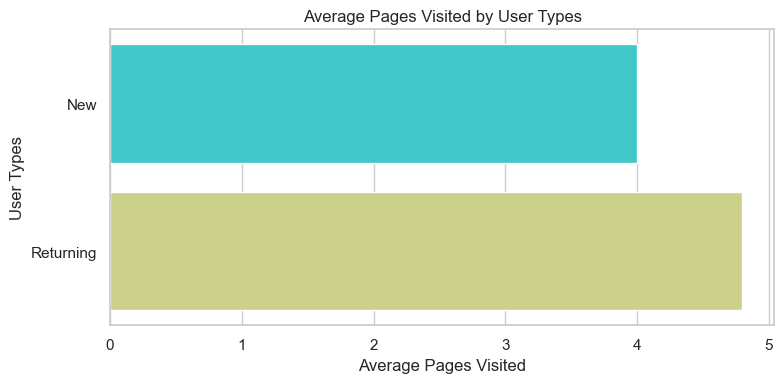

In [20]:
# Calculate average pages visited per user type
avg_pages = df.groupby('UserType')['PagesVisited'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=avg_pages, x='PagesVisited', y='UserType', palette='rainbow')
plt.title('Average Pages Visited by User Types')
plt.xlabel('Average Pages Visited')
plt.ylabel('User Types')
plt.tight_layout()
plt.show()

# Trend Over Time: Average Session Duration

### Goal: Observe if average session duration is increasing or decreasing over time.

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


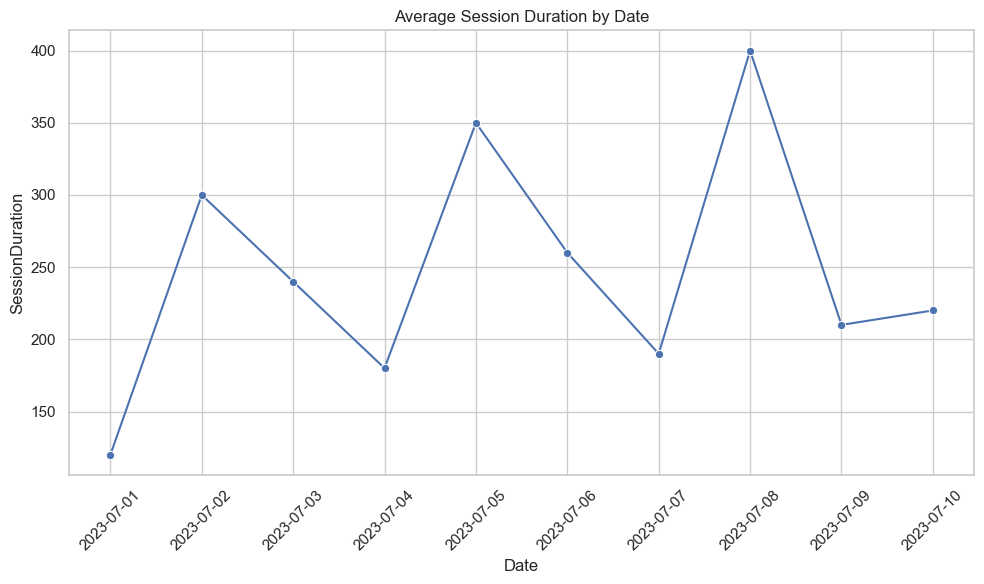

In [25]:
AvgSessionDur = df.groupby('Date')['SessionDuration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=AvgSessionDur, x='Date', y='SessionDuration', marker='o')
plt.xticks(rotation=45)
plt.title('Average Session Duration by Date')
plt.xlabel('Date')
plt.ylabel('SessionDuration')
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optional) Add More Insights

### •	Add pie charts for device usage distribution
### •	Compare average pages visited by device
### •	Find peak traffic days (based on number of visits)

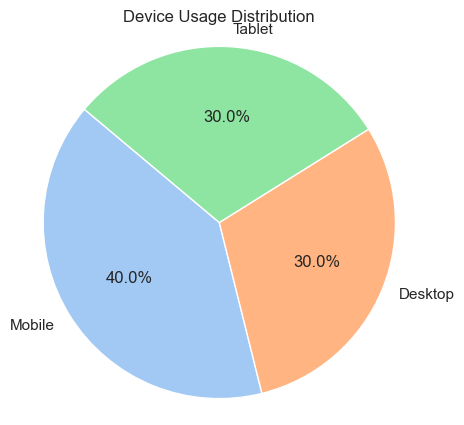

In [27]:
# 1. Device Usage Distribution
# Count of each device
device_counts = df['Device'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Device Usage Distribution')
plt.axis('equal')  # Keeps it circular
plt.show()

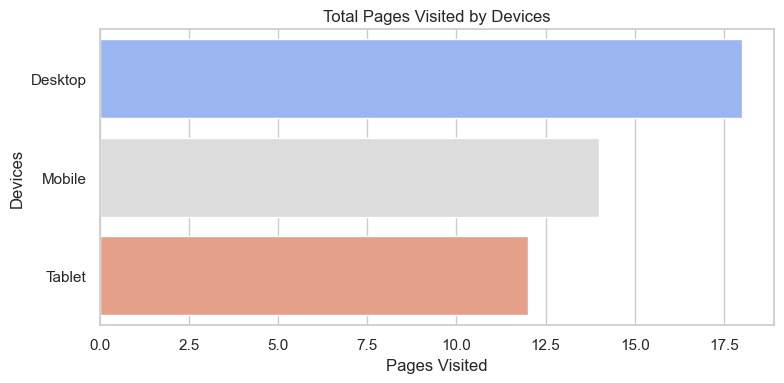

In [30]:
# 2. Average Pages Visited by Device
total_pages = df.groupby('Device')['PagesVisited'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=total_pages, x='PagesVisited', y='Device', palette='coolwarm')
plt.title('Total Pages Visited by Devices')
plt.xlabel('Pages Visited')
plt.ylabel('Devices')
plt.tight_layout()
plt.show()

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


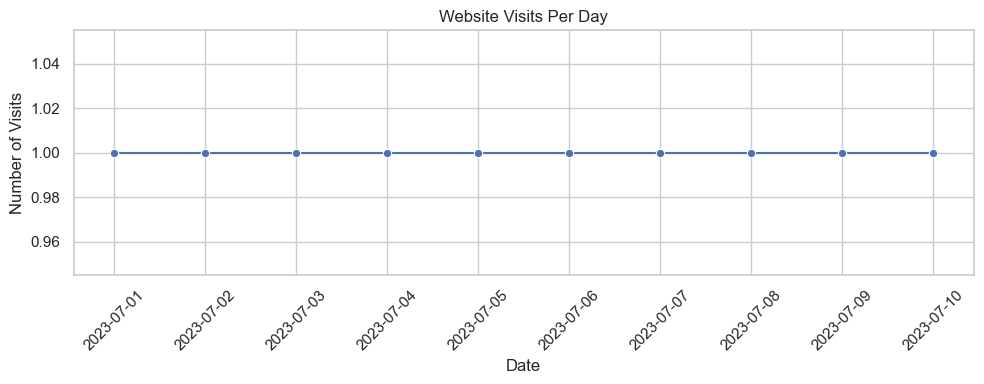

In [31]:
# Peak Traffic Days (based on number of visits)
# Count age visits per day
daily_visits = df.groupby(df['Date'].dt.date).size().reset_index(name='PagesVisited')

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_visits, x='Date', y='PagesVisited', marker='o')
plt.title('Website Visits Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

### Device Performance:

#### ~ Among all devices, Mobile users tend to have the longest session durations and highest average pages visited, suggesting they are more engaged than Mobile or Tablet users.

### User Engagement:

#### ~ Returning users visit more pages on average compared to new users, indicating higher engagement and interest from existing customers.

### Trends Over Time:

#### ~ Traffic shows no clear peak. Suggestion is to keep seasonal or campaign-driven offers. This insight can help in planning marketing pushes or promotional offers.

### Business Recommendation:

#### ~ Focus on optimizing the desktops and mobiles and returning user experience. Consider personalized offers or retargeting ads to maximize conversions.